In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("day.csv")

In [3]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [4]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
df["season"].unique()

array([1, 2, 3, 4], dtype=int64)

In [8]:
df["season"]=df["season"].replace(1,"spring")

In [9]:
df["season"].unique()

array(['spring', 2, 3, 4], dtype=object)

In [10]:
df.loc[(df["season"]==2),"season"]="summer"

In [11]:
df["season"].unique()

array(['spring', 'summer', 3, 4], dtype=object)

In [12]:
df.loc[(df["season"]==3),"season"]="fall"

In [13]:
df["season"].unique()

array(['spring', 'summer', 'fall', 4], dtype=object)

In [14]:
df.loc[(df["season"]==4),"season"]="winter"

In [15]:
df["season"].unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

In [16]:
df["season"].value_counts()



fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [17]:
df["yr"].value_counts()


1    365
0    365
Name: yr, dtype: int64

In [18]:
def object_map(x):
    return x.map({1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"})


In [19]:
df[["mnth"]]=df[["mnth"]].apply(object_map)

In [20]:
df["mnth"].value_counts()

Mar    62
May    62
Jul    62
Jan    62
Oct    62
Aug    62
Dec    62
Jun    60
Nov    60
Apr    60
Sep    60
Feb    56
Name: mnth, dtype: int64

In [21]:
df["holiday"].value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [22]:
def str_map(x):
    return x.map({0:"tues",1:"wed",2:"thur",3:"Fri",4:"Sat",6:"Mon"})

In [23]:
df[["weekday"]]=df[["weekday"]].apply(str_map)

In [24]:
df["weekday"].value_counts()

wed     105
tues    105
Mon     105
thur    104
Sat     104
Fri     103
Name: weekday, dtype: int64

In [25]:
df["workingday"].value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [26]:
df["weathersit"].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [27]:
df.loc[(df["weathersit"]==1),"weathersit"]="A"
df.loc[(df["weathersit"]==2),"weathersit"]="B"
df.loc[(df["weathersit"]==3),"weathersit"]="C"

df.loc[(df["weathersit"]==4),"weathersit"]="D"

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    int64  
 6   weekday     626 non-null    object 
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(7), object(5)
memory usage: 91.4+ KB


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\RobIn\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


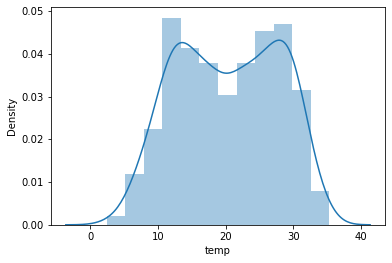

In [30]:
_=sns.distplot(df["temp"])

C:\Users\RobIn\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


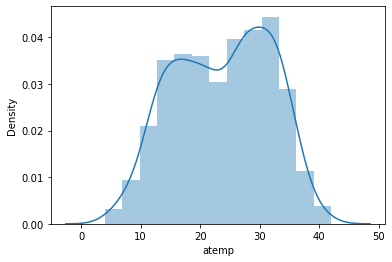

In [31]:
_=sns.distplot(df["atemp"])

C:\Users\RobIn\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


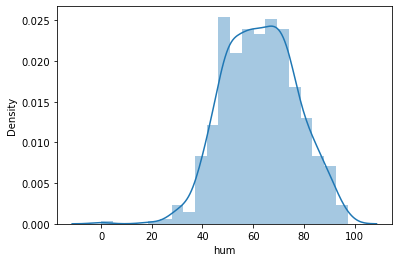

In [32]:
_=sns.distplot(df["hum"])

C:\Users\RobIn\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


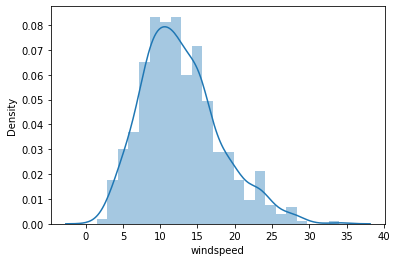

In [33]:
_=sns.distplot(df["windspeed"])

C:\Users\RobIn\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


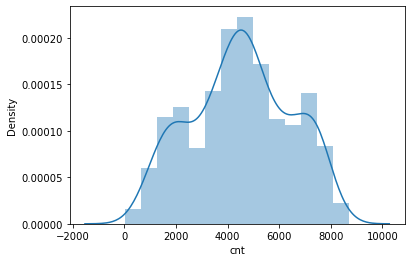

In [34]:
_=sns.distplot(df["cnt"])

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    int64  
 6   weekday     626 non-null    object 
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(7), object(5)
memory usage: 91.4+ KB


In [36]:
df['dteday']=pd.to_datetime(df['dteday'])

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    int64         
 6   weekday     626 non-null    object        
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [38]:
 #df["dteday"]=df["dteday"].astype(df["dteday"])

In [39]:
df_categorical=df.select_dtypes("object")

In [40]:
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   season      730 non-null    object
 1   mnth        730 non-null    object
 2   weekday     626 non-null    object
 3   weathersit  730 non-null    object
dtypes: object(4)
memory usage: 22.9+ KB


In [41]:
df_categorical

,season,mnth,weekday,weathersit
0,spring,Jan,Mon,B
1,spring,Jan,tues,B
2,spring,Jan,wed,A
3,spring,Jan,thur,A
4,spring,Jan,Fri,A
...,...,...,...,...
725,spring,Dec,Sat,B
726,spring,Dec,NaN,B
727,spring,Dec,Mon,B
728,spring,Dec,tues,A


In [42]:
import matplotlib.pyplot as plt

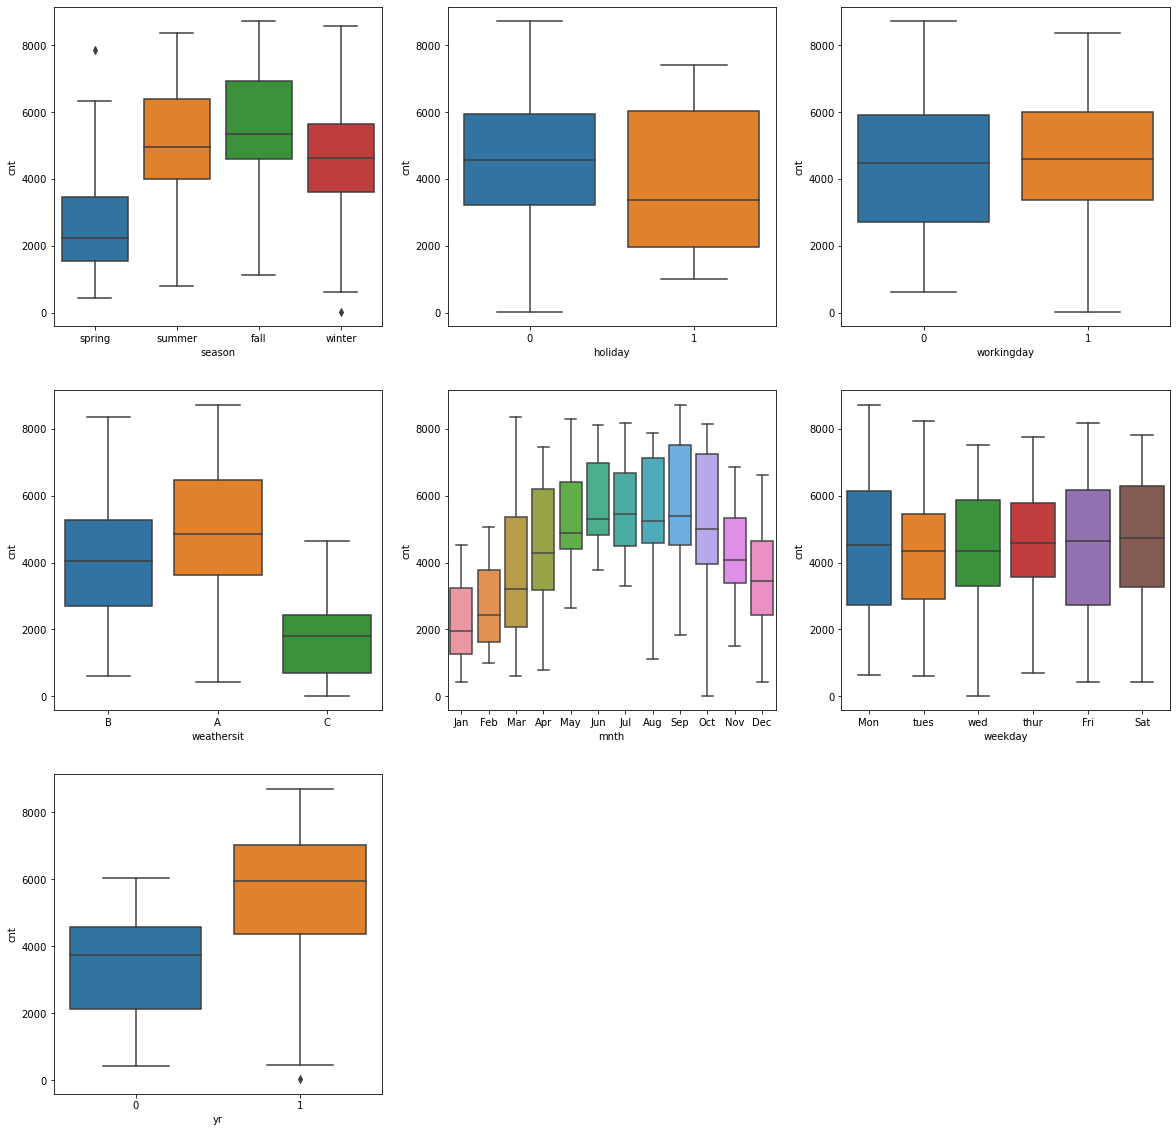

In [43]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x=df["season"],y=df["cnt"])
plt.subplot(3,3,2)
sns.boxplot(x=df["holiday"],y=df["cnt"])
plt.subplot(3,3,3)
sns.boxplot(x=df["workingday"],y=df["cnt"])
plt.subplot(3,3,4)
sns.boxplot(x=df["weathersit"],y=df["cnt"])
plt.subplot(3,3,5)
sns.boxplot(x=df["mnth"],y=df["cnt"])
plt.subplot(3,3,6)
sns.boxplot(x=df["weekday"],y=df["cnt"])
plt.subplot(3,3,7)
sns.boxplot(x=df["yr"],y=df["cnt"])
plt.show()

In [44]:
df_numeric=df.select_dtypes(include=["float64","int64"])


In [45]:
df_numeric.columns

Index(['instant', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'casual', 'registered', 'cnt'],
      dtype='object')

In [46]:
df_numeric=df_numeric.drop(["yr","holiday","workingday"],axis=1)

In [47]:
import numpy as np

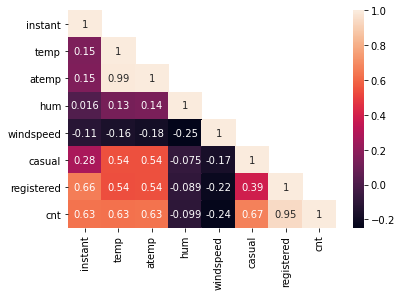

In [48]:
mask=np.array(df_numeric.corr())
mask[np.tril_indices_from(mask)]=False
sns.heatmap(df_numeric.corr(),mask=mask,annot=True)
plt.show()

In [49]:
df_numeric.drop(["atemp"],axis=1,inplace=True)

In [50]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   temp        730 non-null    float64
 2   hum         730 non-null    float64
 3   windspeed   730 non-null    float64
 4   casual      730 non-null    int64  
 5   registered  730 non-null    int64  
 6   cnt         730 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 40.0 KB


In [51]:
df_categorical

,season,mnth,weekday,weathersit
0,spring,Jan,Mon,B
1,spring,Jan,tues,B
2,spring,Jan,wed,A
3,spring,Jan,thur,A
4,spring,Jan,Fri,A
...,...,...,...,...
725,spring,Dec,Sat,B
726,spring,Dec,NaN,B
727,spring,Dec,Mon,B
728,spring,Dec,tues,A


In [52]:
df_dummies=pd.get_dummies(df_categorical,drop_first=True)

In [53]:
df_dummies.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_thur,weekday_tues,weekday_wed,weathersit_B,weathersit_C
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    int64         
 6   weekday     626 non-null    object        
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [55]:
df=df.drop(list(df_categorical.columns),axis=1)

In [56]:
df=pd.concat([df,df_dummies],axis=1)

In [57]:
df.head()

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,...,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_thur,weekday_tues,weekday_wed,weathersit_B,weathersit_C
0,1,2018-01-01,0,0,0,14.110847,18.18125,80.5833,10.749882,331,...,0,0,0,1,0,0,0,0,1,0
1,2,2018-02-01,0,0,0,14.902598,17.68695,69.6087,16.652113,131,...,0,0,0,0,0,0,1,0,1,0
2,3,2018-03-01,0,0,1,8.050924,9.47025,43.7273,16.636703,120,...,0,0,0,0,0,0,0,1,0,0
3,4,2018-04-01,0,0,1,8.200000,10.60610,59.0435,10.739832,108,...,0,0,0,0,0,1,0,0,0,0
4,5,2018-05-01,0,0,1,9.305237,11.46350,43.6957,12.522300,82,...,0,0,0,0,0,0,0,0,0,0


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   instant        730 non-null    int64         
 1   dteday         730 non-null    datetime64[ns]
 2   yr             730 non-null    int64         
 3   holiday        730 non-null    int64         
 4   workingday     730 non-null    int64         
 5   temp           730 non-null    float64       
 6   atemp          730 non-null    float64       
 7   hum            730 non-null    float64       
 8   windspeed      730 non-null    float64       
 9   casual         730 non-null    int64         
 10  registered     730 non-null    int64         
 11  cnt            730 non-null    int64         
 12  season_spring  730 non-null    uint8         
 13  season_summer  730 non-null    uint8         
 14  season_winter  730 non-null    uint8         
 15  mnth_Aug       730 non-

In [59]:
df.drop(["dteday"],axis=1,inplace=True)

In [60]:
df.head()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,...,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_thur,weekday_tues,weekday_wed,weathersit_B,weathersit_C
0,1,0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,...,0,0,0,1,0,0,0,0,1,0
1,2,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,...,0,0,0,0,0,0,1,0,1,0
2,3,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,...,0,0,0,0,0,0,0,1,0,0
3,4,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,...,0,0,0,0,0,1,0,0,0,0
4,5,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,...,0,0,0,0,0,0,0,0,0,0


In [61]:
X=df.drop("cnt",axis=1)
y=df["cnt"]

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [64]:
from sklearn.preprocessing import MinMaxScaler

In [65]:
scaler = MinMaxScaler()

In [66]:
X_train[["temp","hum","windspeed","casual","registered"]]=scaler.fit_transform(X_train[["temp","hum","windspeed","casual","registered"]])

<ipython-input-66-c059ef7b622c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[["temp","hum","windspeed","casual","registered"]]=scaler.fit_transform(X_train[["temp","hum","windspeed","casual","registered"]])
C:\Users\RobIn\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [67]:
X_test[["temp","hum","windspeed","casual","registered"]]=scaler.fit_transform(X_test[["temp","hum","windspeed","casual","registered"]])

<ipython-input-67-8aafcca49658>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[["temp","hum","windspeed","casual","registered"]]=scaler.fit_transform(X_test[["temp","hum","windspeed","casual","registered"]])
C:\Users\RobIn\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [77]:
from sklearn.ensemble import GradientBoostingRegressor

In [78]:
model=GradientBoostingRegressor()

In [79]:
model.fit(X_train,y_train)

GradientBoostingRegressor()

In [80]:
model.score(X_test,y_test)

0.981825071876218

In [81]:
model.score(X_train,y_train)

0.9990695710988964